# PORTFOLIO ASSETS ALLOCATION AND STATISTICAL DATA ANALYSIS
A portfolio is a collection of financial investments such as stocks, fixed income securities (bonds), cash, mutual funds and Exchange Traded Funds (ETFs). Let's assume that you have $1M dollars to invest in the market, how can you allocate these assets among a selected set of securities? Should you invest them all in Apple? S&P500? Bonds? The answer depends on many factors such as client's risk tolerance, target returns and investment time span.

## TYPES OF ASSETS

### 1. EQUITIES (STOCKS):


*   A stock simply represents an ownership of a certain percentage
of a company.
*   A stock gives the owner the right to some shares in a given
company depending on how much stock (shares) they own.
*   Stocks are traded on stock exchanges such as New York Stock
Exchange (NYSE) and regular individuals can buy them via online brokerage firms.
*   Stocks are generally liquid as compared to real estate which could take a much longer time to sell.



### 2. FIXED INCOME SECURITIES (BONDS):


*   Abond is a fixed income that are generally issued by
governments or corporations and represents a loan made by an investor to the borrower.
*   Bonds pay the investor a fixed stated interest rate.
*   Bonds are used by companies and Governments to raise money to fund future projects.
*   Bonds that are less risky such as U.S. Government Bonds pay less interest compared to high risk bonds.
*   Bond coupons represent a semi-annual interest payments to the bond holder.




### 3. EXCHANGE TRADED FUNDS (ETFs):


*   ETFs are a type of security that includes a group of securities and
possibly track an index such as the S&P500.
*   ETFs are like mutual funds however they are marketable securities and are being traded on exchanges similar to any other stock. 
*   ETFs can include a collection of stocks, bonds, and commodities.
*   ETFs have generally low management fees and offer a tool for risk diversification.
*   Vanguard S&P 500 ETF (VOO): https://investor.vanguard.com/etf/profile/performance/voo




## UNERSTAND THE CONCEPT OF ASSET ALLOCATION
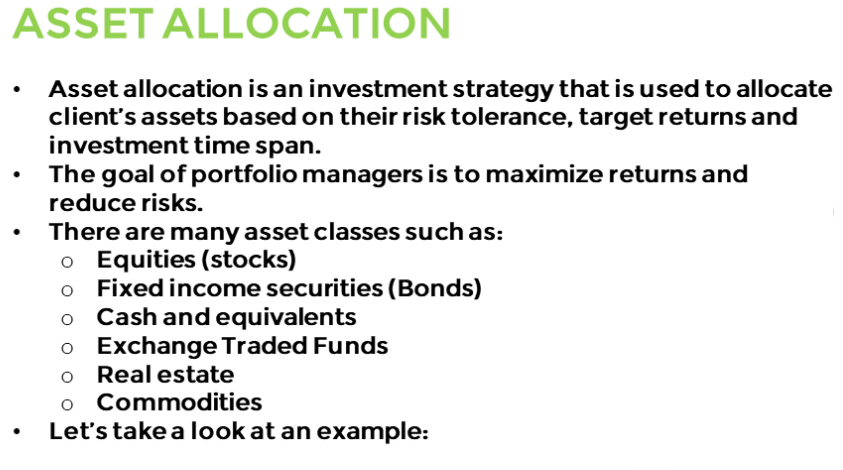
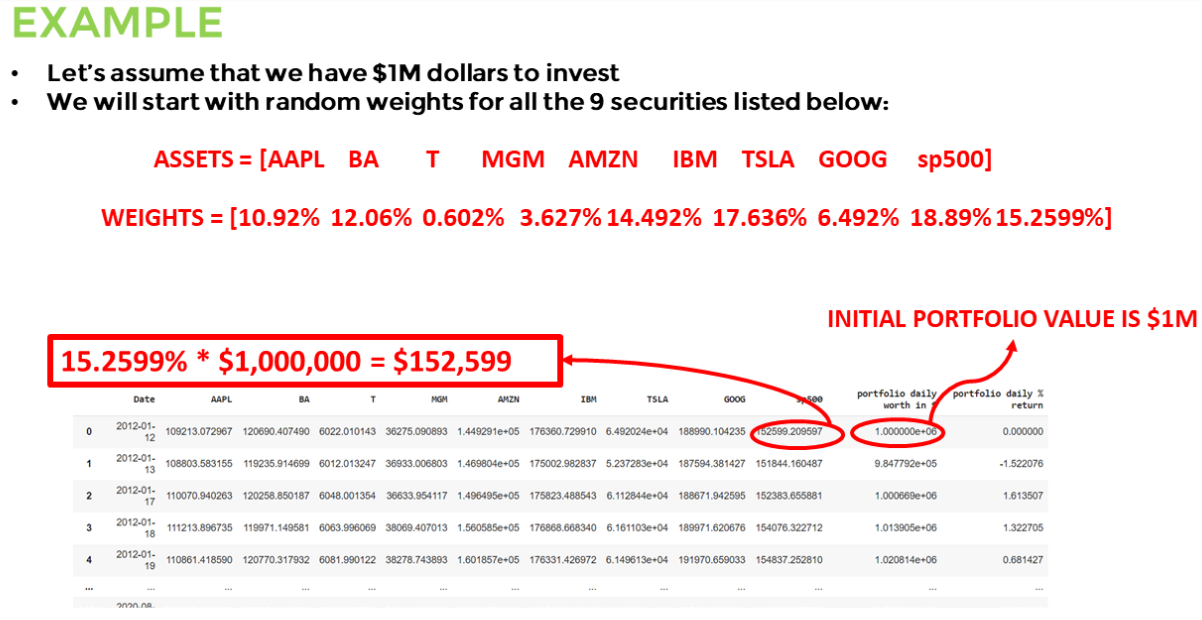
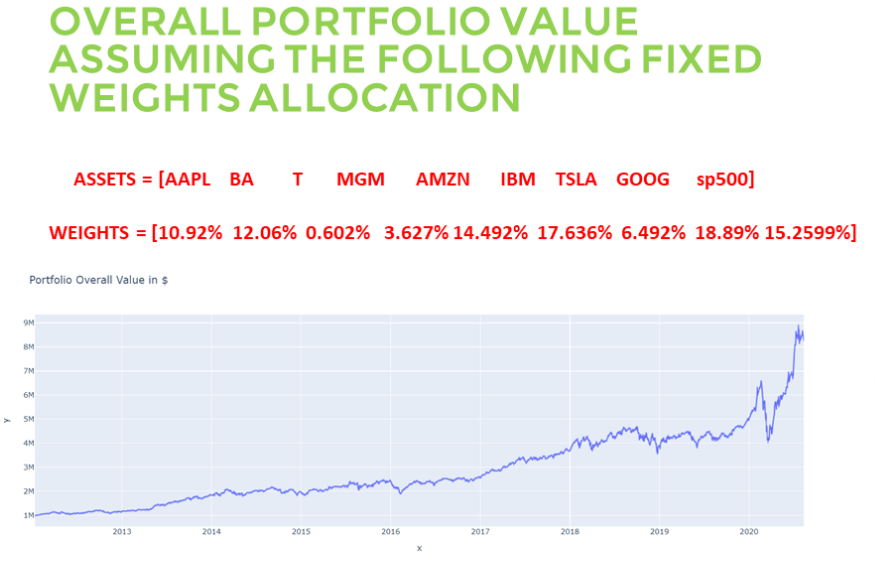

**What is the common advice that financial advisors generally recommend to retired seniors when it comes to asset allocations?**

The conventional wisdom is to subtract client's age from 100 to calculate the % of portolio that should be allocated to stocks

For Example: If you're 30 years old, you should have 70% allocated to stocks

If you are 75 years old, you should invest 25% in stocks (old retired seniors generally recommend a more stable low risk portfolio). 

## IMPORT DATASETS AND LIBRARIES

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [ ]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
# Read the stock data csv file, here's the list of the stocks considered:

# AAPL = Apple Stock 
# BA = Boeing 
# T = AT&T
# MGM = MGM Resorts International (Hotel Industry)
# AMZN = Amazon
# IBM = IBM
# TSLA = Tesla Motors
# GOOG = Google 
# sp500 = US Stock Market (S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on U.S. stock exchange)
# Check the list of S&P 500 companies here: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

stocks_df = pd.read_csv('/content/drive/MyDrive/my files/Financial Analysis/stock.csv')
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [ ]:
# Sort the stock data by date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [ ]:
# Print out the number of stocks
print('Total Number of stocks : {}'.format(len(stocks_df.columns[1:])))

Total Number of stocks : 9


In [ ]:
# Print the name of stocks
print('Stocks under consideration are:')

for i in stocks_df.columns[1:]:
  print(i)

Stocks under consideration are:
AAPL
BA
T
MGM
AMZN
IBM
TSLA
GOOG
sp500


In [ ]:
stocks_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


In [ ]:
# Check if data contains any null values
stocks_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [ ]:
# Getting dataframe info
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


## PERFORM RANDOM ASSET ALLOCATION AND CALCULATE PORTFOLIO DAILY RETURN

In [ ]:
# Let's create random portfolio weights
# Portfolio weights must sum to 1 

# Set random seed
# np.random.seed(101)
np.random.seed()

# Create random weights for the stocks and normalize them
weights = np.array(np.random.random(9))

# Ensure that the sum of all weights are = 1
weights = weights / np.sum(weights) 
print(weights)



[0.10840969 0.03055382 0.03958764 0.14601414 0.13245565 0.13777206
 0.14443767 0.14941387 0.11135547]


In [ ]:
# Normalize the stock avalues 
df_portfolio = normalize(stocks_df)
df_portfolio

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,0.996251,0.987949,0.998340,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2,2012-01-17,1.007855,0.996424,1.004316,1.009893,1.032570,0.996954,0.941593,0.998317,0.998587
3,2012-01-18,1.018320,0.994040,1.006972,1.049464,1.076792,1.002880,0.949027,1.005193,1.009680
4,2012-01-19,1.015093,1.000662,1.009960,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,7.313297,2.308039,0.991036,1.378401,18.217644,0.694821,52.567080,4.698347,2.568715
2155,2020-08-06,7.568452,2.280493,0.990704,1.521847,18.331155,0.698532,52.728494,4.782805,2.585226
2156,2020-08-07,7.383066,2.251622,0.996680,1.568838,18.004093,0.692107,51.423361,4.764919,2.586862
2157,2020-08-10,7.490377,2.375977,1.002656,1.784831,17.894390,0.704016,50.214865,4.770052,2.593956


In [ ]:
df_portfolio.columns[1:]

Index(['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500'], dtype='object')

In [ ]:
# Note that enumerate returns the value and a counter as well
for counter, stock in enumerate(df_portfolio.columns[1:]):
  df_portfolio[stock] = df_portfolio[stock] * weights[counter]
  df_portfolio[stock] = df_portfolio[stock] * 1000000
df_portfolio

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,108409.689782,30553.821214,39587.636840,146014.144204,1.324556e+05,137772.057899,1.444377e+05,149413.866874,111355.468016
1,2012-01-13,108003.212221,30185.603775,39521.918999,148662.380950,1.343303e+05,136711.393155,1.165216e+05,148310.421048,110804.489756
2,2012-01-17,109261.246513,30444.568748,39758.498494,147458.636975,1.367697e+05,137352.367819,1.360015e+05,149162.331160,111198.173067
3,2012-01-18,110395.795274,30371.734849,39863.644936,153236.608056,1.426272e+05,138168.856680,1.370752e+05,150189.844895,112433.354478
4,2012-01-19,110045.909996,30574.051234,39981.934684,154079.228839,1.463991e+05,137749.166600,1.368195e+05,151770.266537,112988.624243
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,792832.220540,70519.398617,39232.766283,201265.980633,2.413030e+06,95726.967393,7.592666e+06,701998.125475,286040.438461
2155,2020-08-06,820493.528922,69677.761648,39219.622977,222211.125804,2.428065e+06,96238.228008,7.615981e+06,714617.423807,287879.019267
2156,2020-08-07,800395.888548,68795.665043,39456.202473,229072.490538,2.384744e+06,95353.065252,7.427470e+06,711944.939434,288061.255177
2157,2020-08-10,812029.482647,72595.166746,39692.783282,260610.570653,2.370213e+06,96993.664504,7.252918e+06,712711.904347,288851.182072


In [ ]:
# Let's create an additional column that contains the sum of all $ values in the portfolio
df_portfolio['portfolio daily worth in $'] = df_portfolio[df_portfolio != 'Date'].sum(axis = 1)
df_portfolio

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,portfolio daily worth in $
0,2012-01-12,108409.689782,30553.821214,39587.636840,146014.144204,1.324556e+05,137772.057899,1.444377e+05,149413.866874,111355.468016,1.000000e+06
1,2012-01-13,108003.212221,30185.603775,39521.918999,148662.380950,1.343303e+05,136711.393155,1.165216e+05,148310.421048,110804.489756,9.730513e+05
2,2012-01-17,109261.246513,30444.568748,39758.498494,147458.636975,1.367697e+05,137352.367819,1.360015e+05,149162.331160,111198.173067,9.974070e+05
3,2012-01-18,110395.795274,30371.734849,39863.644936,153236.608056,1.426272e+05,138168.856680,1.370752e+05,150189.844895,112433.354478,1.014362e+06
4,2012-01-19,110045.909996,30574.051234,39981.934684,154079.228839,1.463991e+05,137749.166600,1.368195e+05,151770.266537,112988.624243,1.020408e+06
...,...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,792832.220540,70519.398617,39232.766283,201265.980633,2.413030e+06,95726.967393,7.592666e+06,701998.125475,286040.438461,1.219331e+07
2155,2020-08-06,820493.528922,69677.761648,39219.622977,222211.125804,2.428065e+06,96238.228008,7.615981e+06,714617.423807,287879.019267,1.229438e+07
2156,2020-08-07,800395.888548,68795.665043,39456.202473,229072.490538,2.384744e+06,95353.065252,7.427470e+06,711944.939434,288061.255177,1.204529e+07
2157,2020-08-10,812029.482647,72595.166746,39692.783282,260610.570653,2.370213e+06,96993.664504,7.252918e+06,712711.904347,288851.182072,1.190662e+07


In [ ]:
# Let's calculate the portfolio daily return 
# Define a new column in the dataframe and set it to zeros
df_portfolio['portfolio daily % return'] = 0.0000

for i in range(1, len(stocks_df)):
  # Calculate the percentage of change from the previous day
  df_portfolio['portfolio daily % return'][i] = ( (df_portfolio['portfolio daily worth in $'][i] - df_portfolio['portfolio daily worth in $'][i-1]) / df_portfolio['portfolio daily worth in $'][i-1]) * 100 

df_portfolio

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,portfolio daily worth in $,portfolio daily % return
0,2012-01-12,108409.689782,30553.821214,39587.636840,146014.144204,1.324556e+05,137772.057899,1.444377e+05,149413.866874,111355.468016,1.000000e+06,0.000000
1,2012-01-13,108003.212221,30185.603775,39521.918999,148662.380950,1.343303e+05,136711.393155,1.165216e+05,148310.421048,110804.489756,9.730513e+05,-2.694866
2,2012-01-17,109261.246513,30444.568748,39758.498494,147458.636975,1.367697e+05,137352.367819,1.360015e+05,149162.331160,111198.173067,9.974070e+05,2.503020
3,2012-01-18,110395.795274,30371.734849,39863.644936,153236.608056,1.426272e+05,138168.856680,1.370752e+05,150189.844895,112433.354478,1.014362e+06,1.699926
4,2012-01-19,110045.909996,30574.051234,39981.934684,154079.228839,1.463991e+05,137749.166600,1.368195e+05,151770.266537,112988.624243,1.020408e+06,0.596007
...,...,...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,792832.220540,70519.398617,39232.766283,201265.980633,2.413030e+06,95726.967393,7.592666e+06,701998.125475,286040.438461,1.219331e+07,0.426167
2155,2020-08-06,820493.528922,69677.761648,39219.622977,222211.125804,2.428065e+06,96238.228008,7.615981e+06,714617.423807,287879.019267,1.229438e+07,0.828899
2156,2020-08-07,800395.888548,68795.665043,39456.202473,229072.490538,2.384744e+06,95353.065252,7.427470e+06,711944.939434,288061.255177,1.204529e+07,-2.026037
2157,2020-08-10,812029.482647,72595.166746,39692.783282,260610.570653,2.370213e+06,96993.664504,7.252918e+06,712711.904347,288851.182072,1.190662e+07,-1.151304


## PORTFOLIO ALLOCATION - DAILY RETURN/WORTH CALCULATION (FUNCTION)

In [ ]:
# Lets assume we have $1,000,000 to be invested and we will allocate this fund based on the weights of the stocks
# We will create a function that takes in the stock prices along with the weights and retun:
# (1) Daily value of each individual securuty in $ over the specified time period
# (2) Overall daily worth of the entire portfolio 
# (3) Daily return 

def portfolio_allocation(df, weights):

  df_portfolio = df.copy()
  
  # Normalize the stock avalues 
  df_portfolio = normalize(df_portfolio)
  
  for counter, stock in enumerate(df_portfolio.columns[1:]):
    df_portfolio[stock] = df_portfolio[stock] * weights[counter]
    df_portfolio[stock] = df_portfolio[stock] * 1000000

  df_portfolio['portfolio daily worth in $'] = df_portfolio[df_portfolio != 'Date'].sum(axis = 1)
  
  df_portfolio['portfolio daily % return'] = 0.0000

  for i in range(1, len(stocks_df)):
    
    # Calculate the percentage of change from the previous day
    df_portfolio['portfolio daily % return'][i] = ( (df_portfolio['portfolio daily worth in $'][i] - df_portfolio['portfolio daily worth in $'][i-1]) / df_portfolio['portfolio daily worth in $'][i-1]) * 100 
  
  # set the value of first row to zero, as previous value is not available
  df_portfolio['portfolio daily % return'][0] = 0
  return df_portfolio

## PERORM PORTFOLIO DATA VISUALIZATION

In [ ]:
# Plot the portfolio daily return
fig = px.line(x = df_portfolio.Date, y = df_portfolio['portfolio daily % return'], title = 'Portfolio Daily % Return')
fig.show()

In [ ]:
# Plot all stocks (normalized)
interactive_plot(df_portfolio.drop(['portfolio daily worth in $', 'portfolio daily % return'], axis = 1), 'Portfolio individual stocks worth in $ over time')

In [ ]:
# Print out a histogram of daily returns
fig = px.histogram(df_portfolio, x = 'portfolio daily % return')
fig.show()

In [ ]:
fig = px.line(x = df_portfolio.Date, y = df_portfolio['portfolio daily worth in $'], title= 'Portfolio Overall Value in $')
fig.show()

## UNDERSTAND PORTFOLIO STATISTICAL METRICS (CUMMULATIVE RETURN, AVERAGE DAILY RETURN, AND SHARPE RATIO)

### Daily Returns
***Stock daily return is a calculation of how much investors have gained or lost per day.***


\begin{align}
    Stock\,Daily\,Return = \frac{Closing\,Stock\,Price_t \,- \,Closing\,Stock \,Price_{t-1}}{Closing\,Stock\,Price_{t-1}}
\end{align}

### Cummulative Return
***Cumulative return is a measure of the aggregate amount that the stock gained or lost over a period of time.***

\begin{align}
    Stock\,Cummulative\,Return = \frac{Current\,Price\,Of\,Stock \,- \,Original Price\,Of\,Stock}{Original\,Price\,Of\,Stock}
\end{align}

### Standard Deviation (Risk/Volatility)

*   ***The standard deviation is a measurement of the dispersion away from the mean.***
*   ***The more spread the data is, the higher the standard deviation.***
*   ***Volatile stocks have high standard deviation and therefore standard deviation represent the risk associated with the security.***

\begin{align}
    Standard\,Deviation = \sqrt{\frac{\sum_{i=1}^n \,(x_i\,-\,\bar{x})^2}{n - 1}}
\end{align}

where: 

* x = Value of data with the index i 
* x = mean value 
* n = total number of data points in the data set

### Sharpe Ratio


*   ***Sharpe ratio is used by investors to calculate the return of an investment compared to its risk.***
*   Sharpe ratio is calculated as follows:

\begin{align}
    Sharpe\,Ratio = \frac{R_p \,- \,R_f}{\sigma_p}
\end{align}

*   ***Sharpe ratio is simply a calculation of the average return earned in excess of the risk free rate (U.S. government bonds) per unit of risk (volatility).***
*   ***Note that $R_f$, is the risk-free rate of return which is the
return on an investment with zero risk, meaning it's the return investors could expect for taking no risk.***
*   ***As Sharpe ratio increases, risk-adjusted return increases and security becomes more desired by investors.***



## CALCULATE PORTFOLIO STATISTICAL METRICS (CUMMULATIVE RETURN, AVERAGE DAILY RETURN, AND SHARPE RATIO)

In [ ]:
# Cummulative return of the portfolio (Note that we now look for the last net worth of the portfolio compared to it's start value)
cummulative_return = ((df_portfolio['portfolio daily worth in $'][-1:] - df_portfolio['portfolio daily worth in $'][0])/ df_portfolio['portfolio daily worth in $'][0]) * 100
print('Cummulative return of the portfolio is {} %'.format(cummulative_return.values[0]))


Cummulative return of the portfolio is 1059.416072625107 %


In [ ]:
# Calculate the portfolio standard deviation
print('Standard deviation of the portfolio is {}'.format(df_portfolio['portfolio daily % return'].std()))

Standard deviation of the portfolio is 1.7884063807869621


In [ ]:
# Calculate the average daily return 
print('Average daily return of the portfolio is {} %'.format(df_portfolio['portfolio daily % return'].mean() ))

Average daily return of the portfolio is 0.12958370691764912 %


In [ ]:
# Portfolio sharpe ratio
sharpe_ratio = df_portfolio['portfolio daily % return'].mean() / df_portfolio['portfolio daily % return'].std() * np.sqrt(252) 
#why 256? cuz for the annual daily sharpe  ratio (stocks active day).
print('Sharpe ratio of the portfolio is {}'.format(sharpe_ratio))
# more the better.

Sharpe ratio of the portfolio is 1.1502293868548445
